Підключіться до одного з наборів даних на Kaggle. Розберіться у тому, як влаштований ваш датасет і яка постановка задачі

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

path = "/content/drive/My Drive/bigml_59c28831336c6604c800002a.csv"
bnk = pd.read_csv(path, sep=',')
bnk.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
print(bnk['churn'].value_counts())
bnk['churn'].value_counts(normalize = True)

False    2850
True      483
Name: churn, dtype: int64


False    0.855086
True     0.144914
Name: churn, dtype: float64

In [ ]:
bnk.groupby('area code')['phone number'].count()

area code
408     838
415    1655
510     840
Name: phone number, dtype: int64

In [ ]:
bnk.drop(["phone number","area code"], axis = 1, inplace=True)
bnk.head(10)

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [ ]:
bnk['international plan'] = bnk['international plan'].map({'no': 0, 'yes': 1})
bnk['voice mail plan'] = bnk['voice mail plan'].map({'no': 0, 'yes': 1})
bnk['churn'] = bnk['churn'].map({False: 0, True: 1})
bnk.head(10)

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [ ]:
bnk = pd.get_dummies(bnk, columns=['state'], prefix=['state'], drop_first=True)
bnk.head(10)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0
5,118,1,0,0,223.4,98,37.98,220.6,101,18.75,...,0,0,0,0,0,0,0,0,0,0
6,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,0,0,0,0,0,0,0,0,0,0
7,147,1,0,0,157.0,79,26.69,103.1,94,8.76,...,0,0,0,0,0,0,0,0,0,0
8,117,0,0,0,184.5,97,31.37,351.6,80,29.89,...,0,0,0,0,0,0,0,0,0,0
9,141,1,1,37,258.6,84,43.96,222.0,111,18.87,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
bnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

std_col = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes',
                   'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
                   'total intl calls', 'total intl charge', 'customer service calls']

bnk[std_col] = scaler.fit_transform(bnk[std_col])
bnk.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.676489,0,1,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,...,0,0,0,0,0,0,0,0,0,0
1,0.149065,0,1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,...,0,0,0,0,0,0,0,0,0,0
2,0.902529,0,0,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,...,0,0,0,0,0,0,0,0,0,0
3,-0.428590,1,0,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,...,0,0,0,0,0,0,0,0,0,0
4,-0.654629,1,0,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,...,0,0,0,0,0,0,0,0,0,0



Розбийте набір даних на навчальну та валідаційну (тестову) вибірки за допомогою функції train_test_split

In [ ]:
Y = bnk.churn
X = bnk.drop('churn', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.3, random_state=19)

Навчіть алгоритм класифікації DecisionTreeClassifier або регресії DecisionTreesRegressor

Оцініть якість кожної моделі на валідаційній вибірці за допомогою

• accuracy_score для класифікації; • mean_squared_error для регресії

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

tree = DecisionTreeClassifier(random_state=2019, max_depth=3)
tree.fit(X_train, Y_train)

Y_pred = tree.predict(X_valid)
f1_score(Y_valid, Y_pred)

0.5821596244131455

Створіть генератор розбиття, який перемішує вибірку перед створенням блоків (shuffle=True). Кількість блоків n_splits дорівнює 5. Вкажіть параметр random_state для відтворення результатів. Наприклад:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

kf = KFold(n_splits=5, shuffle=True, random_state=42)
f1 = make_scorer(f1_score)

tree_params = {'max_depth': np.arange(5, 10),
               'min_samples_leaf': np.arange(5, 10),
               'min_samples_split': np.arange(5, 10),
               'max_features': np.arange(10, 15)}
tree_grid = GridSearchCV(tree, tree_params, cv=kf, scoring=f1)

tree_grid.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=3, random_state=2019),
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': array([10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([5, 6, 7, 8, 9]),
                         'min_samples_split': array([5, 6, 7, 8, 9])},
             scoring=make_scorer(f1_score))

In [ ]:
tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=9, max_features=14, min_samples_leaf=5,
                       min_samples_split=5, random_state=2019)

In [ ]:
best_tree = tree_grid.best_estimator_
Y_pred = best_tree.predict(X_valid)
f1_score(y_valid, Y_pred)

0.7355371900826446

Здійснення крос-валідації моделі для підбору гіперпараметрів:

- Максимальна глибина дерева max_depth

- Мінімальна кількість об'єктів для розбиття у внутрішній вершині
min_samples_split

- Мінімальна кількість об'єктів у листковій вершині min_samples_leaf

- Максимальна кількість ознак, що розглядаються при пошуку кращого розбиття max_features

Використовуйте GridSearchCV. Задайте інтервали значень гіперпараметрів самостійно

Побудуйте валідаційні криві (залежність метрик від значень гіперпараметрів). Зробіть висновки

Побудуйте графічно отримане дерево. Оцініть важливість ознак за допомогою атрибуту feature_importances_

In [ ]:
features = {f'f{i + 1}': name for i, name in enumerate(X.columns)}
importances = best_tree.feature_importances_
num_to_plot = 10

feature_ranking = sorted(zip(features.values(), importances), key=lambda x: x[1], reverse=True)
for rank, (feature, importance) in enumerate(feature_ranking[:num_to_plot], 1):
    print(f"{rank}. {feature}: {importance:.4f}")

1. total day minutes: 0.3591
2. customer service calls: 0.1365
3. international plan: 0.1001
4. total eve minutes: 0.0984
5. total intl charge: 0.0662
6. total intl calls: 0.0650
7. number vmail messages: 0.0637
8. total eve charge: 0.0258
9. total day charge: 0.0214
10. total night minutes: 0.0132


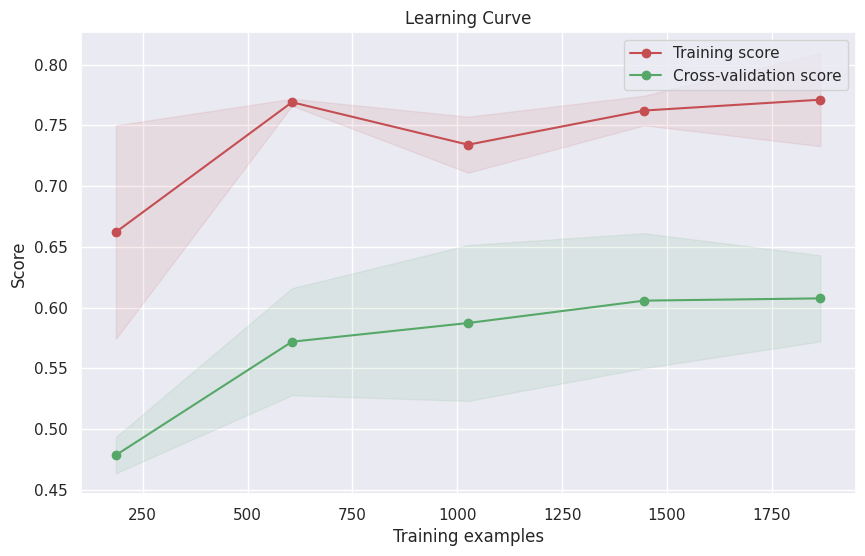

In [ ]:
from sklearn.model_selection import learning_curve

model = best_tree
train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv=5, scoring='f1', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

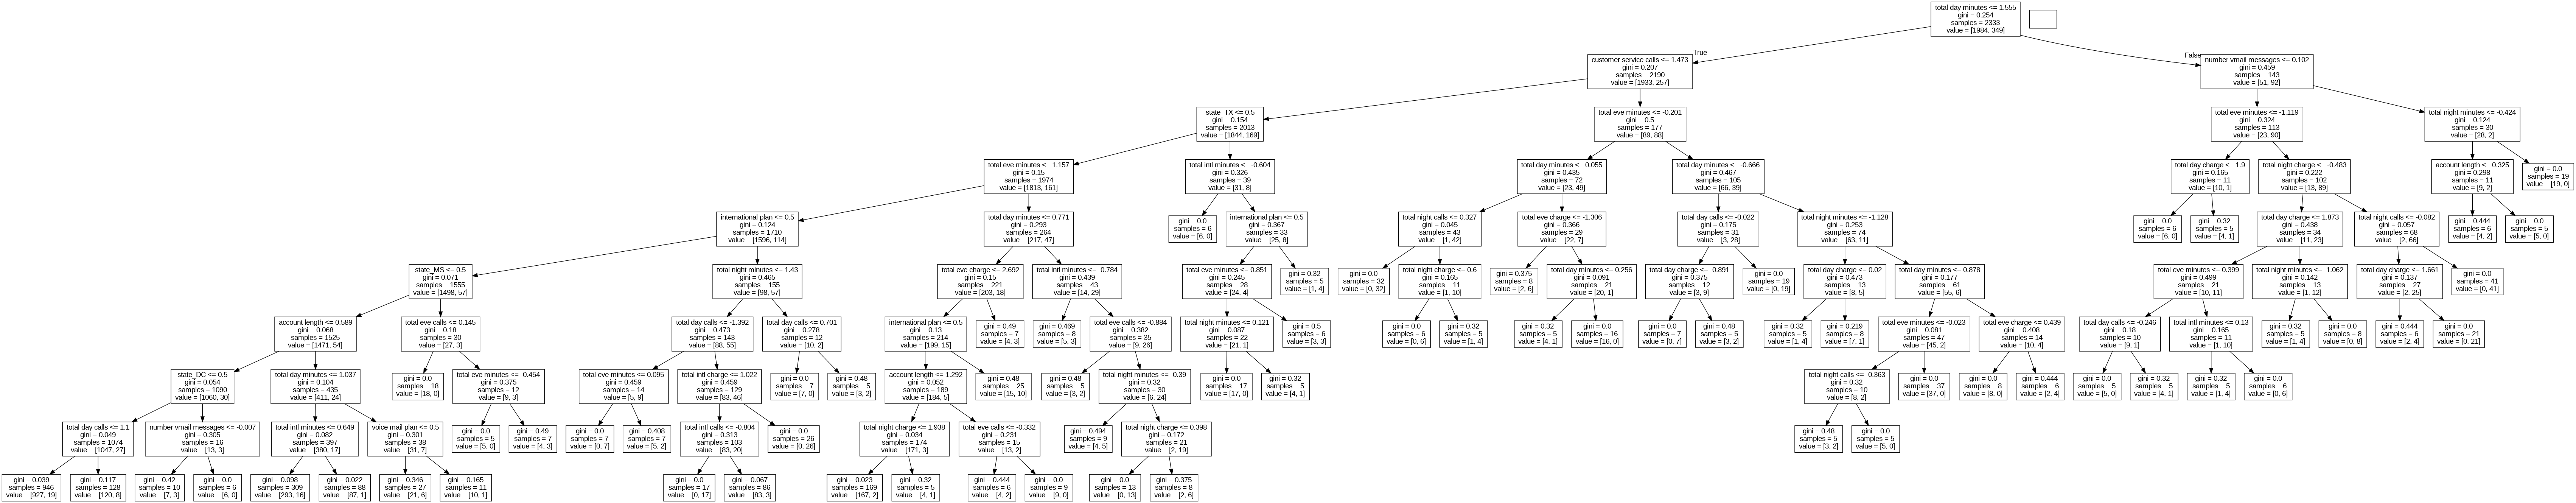

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(best_tree, out_file='best_tree.dot', feature_names=X.columns.values)
import pydotplus
from IPython.display import Image
dot_file = open('best_tree.dot').read()
graph = pydotplus.graph_from_dot_data(dot_file)
graph.write_png('best_tree.png')
Image(filename='best_tree.png')

Побудуйте модель випадкового лісу (Random Forest) для вашої задачі з гіперпараметрами за замовчуванням та оцініть якість моделі на відкладеній вибірці

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=2019)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)

f1_score(y_valid, y_pred)

0.7567567567567568

Здійснити підбір гіперпараметрів моделі:

Кількість дерев (n_estimators);

Максимальна глибина кожного дерева (max_depth);

Мінімальна кількість об'єктів для розгалуження у внутрішній вершині (min_samples_split);

Мінімальна кількість об'єктів у кожному листку (min_samples_leaf);

Максимальна кількість ознак, які розглядаються при пошуку кращого розбиття (max_features)

In [ ]:
forest_params = {'n_estimators': [50, 100, 200],
                 'max_depth': np.arange(10, 14),
                 'min_samples_leaf': np.arange(3, 6),
                 'min_samples_split': np.arange(3, 6),
                 'max_features': np.arange(10, 14)}
rf_grid = GridSearchCV(rf, forest_params, scoring=f1, cv=kf)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=2019),
             param_grid={'max_depth': array([10, 11, 12, 13]),
                         'max_features': array([10, 11, 12, 13]),
                         'min_samples_leaf': array([3, 4, 5]),
                         'min_samples_split': array([3, 4, 5]),
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(f1_score))

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=12, max_features=13, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=50, random_state=2019)

In [ ]:
best_forest = rf_grid.best_estimator_
y_pred = best_forest.predict(X_valid)
f1_score(Y_valid, y_pred)

0.7863247863247863

Оцініть важливість ознак цієї моделі. Візуалізуйте топ-10 найкорисніших ознак за допомогою стовпчастої діаграми

In [ ]:
importances = best_forest.feature_importances_ if hasattr(best_forest, 'feature_importances_') else best_tree.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(num_to_plot):
    print(f + 1, features[f'f{indices[f] + 1}'], importances[indices[f]])

Feature ranking:
1 total day charge 0.17619278513185113
2 total day minutes 0.150255259944357
3 customer service calls 0.13639535739523792
4 international plan 0.08989200737699826
5 total eve charge 0.06552929653459207
6 total eve minutes 0.056053653793837914
7 total intl calls 0.038114364633530254
8 total intl minutes 0.03760740997999095
9 total intl charge 0.03641441905195518
10 total night minutes 0.029343037578101132


Порівняйте результати трьох моделей: методу найближчих сусідів, дерева рішень та випадкового лісу

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_valid)
f1_score(Y_valid, y_pred)

0.40883977900552493